In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:>

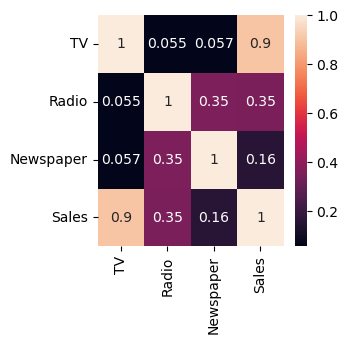

In [16]:
plt.figure(figsize=(3,3))
sn.heatmap(df.corr(), annot=True)

In [17]:
# Separating Input and Output data
x = df.iloc[: , 0:3]
y = df.iloc[: , -1]

In [18]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

#### Simple Regression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2)

In [22]:
x_train.shape

(160, 3)

In [23]:
y_test.shape

(40,)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.predict(x_test)

array([19.32515325, 11.52831872, 10.03618147, 19.69685968,  9.98152092,
       14.69285176, 21.70912117, 13.61175609,  9.46408762, 10.70489119,
       12.68649473,  9.95013922, 19.0057465 , 22.6871386 , 23.67098687,
       10.69726532,  8.94184315, 12.44359303, 17.09813147, 19.41354108,
       21.17926891, 16.83856088, 18.01920122, 21.5180181 , 18.44377938,
       15.61318612, 17.99224327, 18.68243114, 17.03993556, 14.4375153 ,
       17.38840269,  9.26842932,  7.14448919, 11.35529524, 22.05299092,
       10.57540207, 12.20430641,  7.54000748, 22.13204968, 18.16260387])

In [28]:
lr.score(x_test,y_test)

0.8737637709715894

In [33]:
x = x.iloc[: , 0:2]

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2)

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
lr.score(x_test,y_test)

0.9297309085937084

Simple Linear Regression gives accuracy of 93%

#### Polynomial Regression

In [40]:
x

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [41]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(degree=3)

In [44]:
x = poly.fit_transform(x)

In [45]:
x

array([[1.00000000e+00, 2.30100000e+02, 3.78000000e+01, ...,
        2.00135918e+06, 3.28776084e+05, 5.40101520e+04],
       [1.00000000e+00, 4.45000000e+01, 3.93000000e+01, ...,
        7.78238250e+04, 6.87298050e+04, 6.06984570e+04],
       [1.00000000e+00, 1.72000000e+01, 4.59000000e+01, ...,
        1.35790560e+04, 3.62371320e+04, 9.67025790e+04],
       ...,
       [1.00000000e+00, 1.77000000e+02, 9.30000000e+00, ...,
        2.91359700e+05, 1.53087300e+04, 8.04357000e+02],
       [1.00000000e+00, 2.83600000e+02, 4.20000000e+01, ...,
        3.37801632e+06, 5.00270400e+05, 7.40880000e+04],
       [1.00000000e+00, 2.32100000e+02, 8.60000000e+00, ...,
        4.63285526e+05, 1.71661160e+04, 6.36056000e+02]])

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2)

In [47]:
lr1 = LinearRegression()

In [48]:
lr1.fit(x_train,y_train)

LinearRegression()

In [49]:
lr1.score(x_test,y_test)

0.9660163996484875

In [50]:
lr1.score(x_train,y_train)

0.9307243544287459

Polynomial Regression gives better accuracy which is 93-96%

In [51]:
lr1.predict(x_test)

array([19.14441231, 14.40783592, 12.34119088,  9.05190947, 10.33062908,
       13.34372948, 12.21181061, 21.81814167, 17.63190352, 20.0365794 ,
       17.96790614,  7.7175356 , 17.56875558, 20.93780266, 16.23578791,
       19.04973842, 19.08828734,  8.53673773, 25.62906948, 18.09411382,
       20.9716656 , 11.53099316, 20.24971068, 27.3630932 , 11.20790901,
       10.14119003, 24.35462043, 23.70732496, 15.74428614, 19.84958128,
       20.58410288, 17.29632089, 10.33187959,  6.54330147, 13.39453092,
        9.16571941, 21.8894471 ,  5.51469952, 17.25536956,  8.11914308])